# Experiment 01

First Tests from the predictions.

In [1]:
import numpy as np
import pandas as pd
import math

import sys
sys.path.insert(1, 'C:\\Users\\Adrion\\Desktop\\TG\\DayTradeSystem\\Part1_Prediction')
import Utils 
from Utils import calculateEMA, calculateBB, addPreviousDays, removeColumns, getPeriod, mape, mae, createDate, getDate, printResult

import matplotlib.pyplot as plt
import matplotlib.dates as mpdates
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc

import warnings
warnings.filterwarnings('ignore')


def getPeriod2(df, begin, end, resetIndex = False):
    """
    Returns the df in the chosen interval
    
    Object begin: Start date forrmated as 'yyyy.mm.dd'.
    Object   end: End date 'yyyy.mm.dd'.

    returns a dataframe with the historic of the selected period
    """
    
    indexBegin = df[df['date']==begin].index[0]
    indexEnd = df[df['date']==end].tail(1).index[0]
    
    if (resetIndex):
        return df[(df.index >= indexBegin) & (df.index <= indexEnd)].reset_index(drop=True)
    else: 
        return df[(df.index >= indexBegin) & (df.index <= indexEnd)]

In [2]:
dfColumns = ['date','time','open', 'high', 'low','close','tickvol','volume','spread']
newColumns = ['open', 'high', 'low', 'close']

TEST_BEGIN = '2020.06.01'
TEST_END = '2021.06.01'

In [3]:
df = pd.read_csv('../Data/PETR4_M15.csv', sep = "\t")
df.columns = dfColumns
df = removeColumns(df, ['tickvol', 'volume','spread'])

df2 = pd.read_csv('../Data/VALE3_M15.csv', sep = "\t")
df2.columns = dfColumns
df2 = removeColumns(df2, ['tickvol', 'volume','spread'])

initialDf_PETR4 = getPeriod2(df, TEST_BEGIN, TEST_END)
initialDf_VALE3 = getPeriod2(df2, TEST_BEGIN, TEST_END)

In [4]:
initialDf_PETR4

,date,time,open,high,low,close
0,2020.06.01,10:00:00,19.50,19.59,19.38,19.59
1,2020.06.01,10:15:00,19.58,19.68,19.35,19.45
2,2020.06.01,10:30:00,19.46,19.67,19.35,19.64
3,2020.06.01,10:45:00,19.64,19.73,19.49,19.52
4,2020.06.01,11:00:00,19.52,19.74,19.48,19.68
...,...,...,...,...,...,...
7311,2021.06.01,15:45:00,27.14,27.14,27.05,27.06
7312,2021.06.01,16:00:00,27.06,27.09,27.01,27.02
7313,2021.06.01,16:15:00,27.01,27.17,27.01,27.14
7314,2021.06.01,16:30:00,27.15,27.31,27.11,27.27


In [5]:
initialDf_VALE3

,date,time,open,high,low,close
0,2020.06.01,10:00:00,49.43,49.56,49.14,49.45
1,2020.06.01,10:15:00,49.43,49.78,49.42,49.57
2,2020.06.01,10:30:00,49.58,49.79,49.29,49.72
3,2020.06.01,10:45:00,49.72,50.03,49.62,49.94
4,2020.06.01,11:00:00,49.94,49.97,49.70,49.86
...,...,...,...,...,...,...
7301,2021.06.01,15:45:00,113.84,113.95,113.61,113.72
7302,2021.06.01,16:00:00,113.72,114.00,113.70,113.99
7303,2021.06.01,16:15:00,113.99,114.00,113.90,113.96
7304,2021.06.01,16:30:00,113.97,114.00,113.88,113.88


In [6]:
pred_PETR4 = pd.DataFrame()

aux = pd.read_pickle('../Data/PETR4_Pred_ytd_RF.pkl')
aux = aux.reset_index()

pred_PETR4['date'] = aux['date']
pred_PETR4['high'] = aux['high']
pred_PETR4['low'] = aux['low']
pred_PETR4['high_RF'] = aux['high_pred']
pred_PETR4['low_RF'] = aux['low_pred']

aux = pd.read_pickle('../Data/PETR4_Pred_ytd_ANN15.pkl')
aux = aux.reset_index()
pred_PETR4['high_ANN15'] = aux['high_pred']
pred_PETR4['low_ANN15'] = aux['low_pred']

aux = pd.read_pickle('../Data/PETR4_Pred_ytd_Bench.pkl')
aux = aux.reset_index()
pred_PETR4['high_bench'] = aux['high_pred']
pred_PETR4['low_bench'] = aux['low_pred']

pred_PETR4.head(15)

,date,high,low,high_RF,low_RF,high_ANN15,low_ANN15,high_bench,low_bench
0,2020.06.01,19.89,19.35,19.92820,19.36218,20.210584,19.421107,19.68,18.67
1,2020.06.02,20.70,19.93,20.29546,19.72336,20.389596,19.601935,19.89,19.35
2,2020.06.03,21.20,20.71,22.13276,20.98760,21.041805,20.256477,20.70,19.93
3,2020.06.04,21.07,20.36,20.99832,20.45796,21.472882,20.687181,21.20,20.71
4,2020.06.05,22.28,21.34,22.14836,21.00934,21.898420,21.115501,21.07,20.36
5,2020.06.08,21.86,21.29,22.20718,21.13986,22.537988,21.754582,22.28,21.34
6,2020.06.09,21.32,20.94,21.97440,21.05076,22.438904,21.654954,21.86,21.29
7,2020.06.10,21.19,20.32,21.84592,20.96758,22.212502,21.430488,21.32,20.94
8,2020.06.12,20.48,19.45,20.37174,19.74398,21.323049,20.538011,21.19,20.32
9,2020.06.15,20.40,18.91,19.78546,19.01174,20.531227,19.742825,20.48,19.45


In [7]:
pred_VALE3 = pd.DataFrame()

aux = pd.read_pickle('../Data/VALE3_Pred_ytd_RF.pkl')
aux = aux.reset_index()

pred_VALE3['date'] = aux['date']
pred_VALE3['high'] = aux['high']
pred_VALE3['low'] = aux['low']
pred_VALE3['high_RF'] = aux['high_pred']
pred_VALE3['low_RF'] = aux['low_pred']

aux = pd.read_pickle('../Data/VALE3_Pred_ytd_ANN15.pkl')
aux = aux.reset_index()
pred_VALE3['high_ANN15'] = aux['high_pred']
pred_VALE3['low_ANN15'] = aux['low_pred']

aux = pd.read_pickle('../Data/VALE3_Pred_ytd_Bench.pkl')
aux = aux.reset_index()
pred_VALE3['high_bench'] = aux['high_pred']
pred_VALE3['low_bench'] = aux['low_pred']

pred_VALE3.head(15)

,date,high,low,high_RF,low_RF,high_ANN15,low_ANN15,high_bench,low_bench
0,2020.06.01,50.40,49.14,49.91982,48.72682,49.805024,48.718655,49.60,47.79
1,2020.06.02,50.35,49.60,50.73920,49.24922,50.425494,49.424884,50.40,49.14
2,2020.06.03,50.86,49.96,51.06704,49.87950,50.480267,49.489966,50.35,49.60
3,2020.06.04,52.13,50.09,51.15260,49.90818,50.722016,49.768895,50.86,49.96
4,2020.06.05,53.07,50.86,53.40794,52.04738,51.812381,51.005018,52.13,50.09
5,2020.06.08,52.08,50.52,51.83162,50.21864,51.302958,50.439018,53.07,50.86
6,2020.06.09,51.47,50.65,51.68660,50.18364,50.851260,49.928235,52.08,50.52
7,2020.06.10,51.66,50.31,51.71858,50.43242,51.135711,50.244778,51.47,50.65
8,2020.06.12,50.59,48.65,51.46022,50.00840,50.443091,49.467097,51.66,50.31
9,2020.06.15,50.94,48.79,50.04816,48.63832,49.848469,48.788454,50.59,48.65


In [8]:
def formatTitleDate(df, stock):
    firstDate = df['date'].head(1).reset_index(drop=True)[0]
    lastDate = df['date'].tail(1).reset_index(drop=True)[0]
    
    aux = firstDate.split(sep='.')
    
    firstDate = aux[2]+'/'+aux[1]+'/'+aux[0]
    
    aux = lastDate.split(sep='.')
    lastDate = aux[2]+'/'+aux[1]+'/'+aux[0]
    
    return stock + ' (' +firstDate + ' - ' + lastDate +(')')

def plotDf(df, stock, isHigh=True):
    dfs = {}
    chunk = 85

    df = df.reset_index()

    for n in range((df.shape[0] // chunk + 1)):
        df_temp = df.iloc[n*chunk:(n+1)*chunk]
        #df_temp = df_temp.reset_index(drop=True)
        dfs[n] = df_temp

    if df.shape[0] % chunk != 0:
        df_temp = df.iloc[-int(df.shape[0] % chunk):]
        #df_temp = df_temp.reset_index(drop=True)
        dfs[n] = df_temp
    else:
        pass

    for i in range(0,len(dfs)):
        #print(dfs[i][['high','high_ANN15']])
        plt.figure(figsize=(10,5),dpi = 160)
        if(isHigh):
            plt.plot(dfs[i].index, dfs[i]['high'], label = "Real")
            plt.plot(dfs[i].index, dfs[i]['high_RF'], label = "Random Forest")
            plt.plot(dfs[i].index, dfs[i]['high_ANN15'], label = "ANN")
            plt.plot(dfs[i].index, dfs[i]['high_bench'], label = "1-day Lag", linestyle=":")
        else:
            plt.plot(dfs[i].index, dfs[i]['low'], label = "Real")
            plt.plot(dfs[i].index, dfs[i]['low_RF'], label = "Random Forest")
            plt.plot(dfs[i].index, dfs[i]['low_ANN15'], label = "ANN")
            plt.plot(dfs[i].index, dfs[i]['low_bench'], label = "1-day Lag", linestyle=":")
        
        plt.title(formatTitleDate(dfs[i],stock))
        plt.legend()
        plt.savefig(stock + '_test'+str(i)+'.png')
        plt.show()
        plt.clf

High: 4.84 +- 5.83 %
None


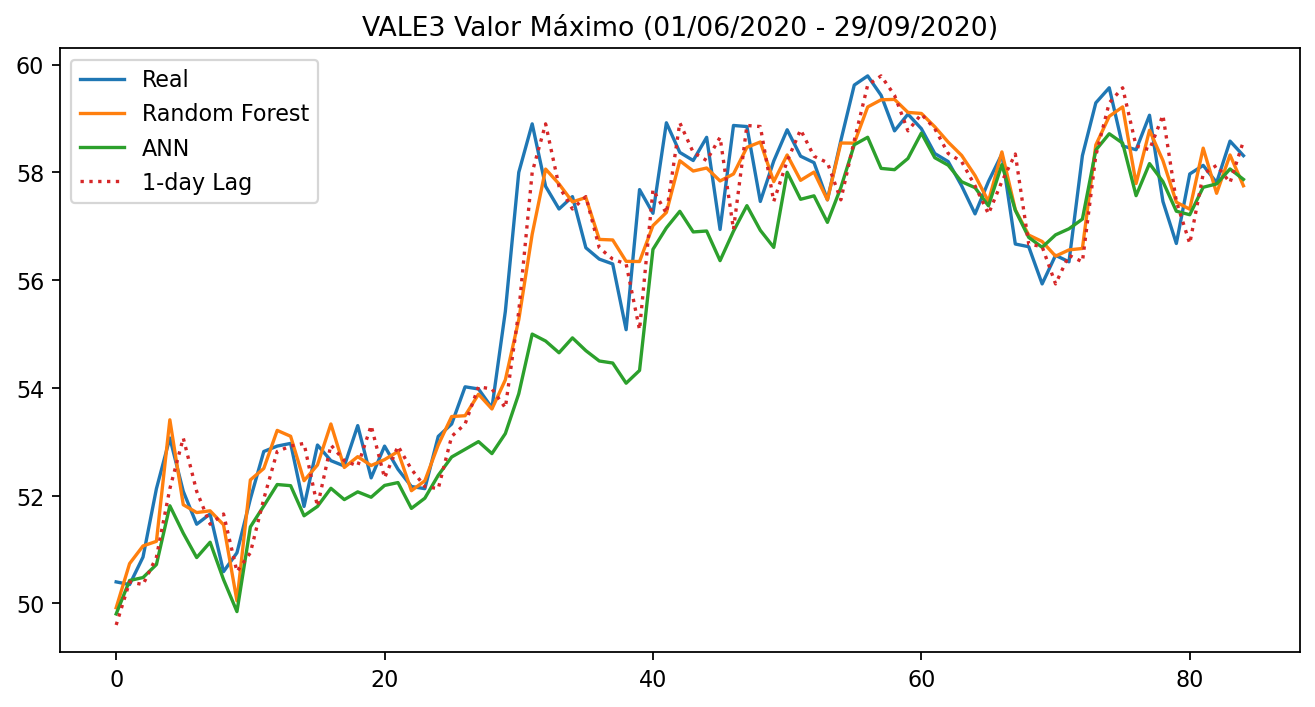

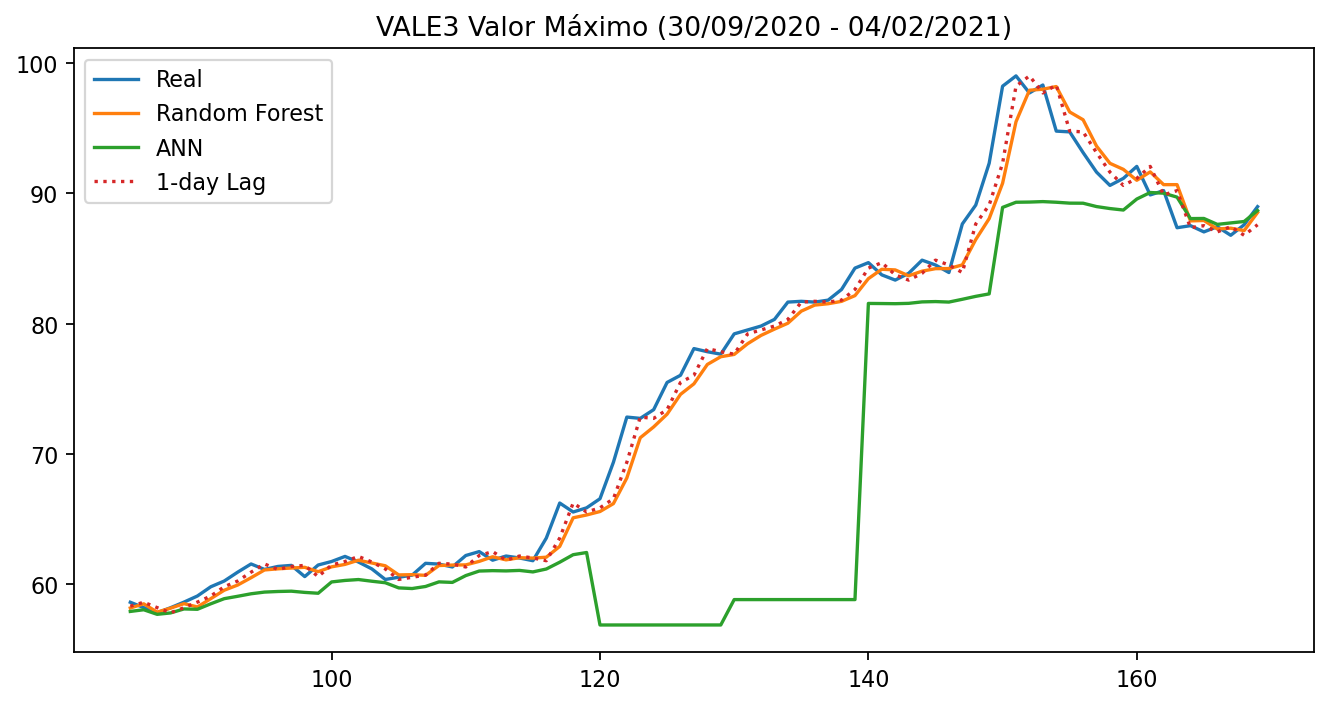

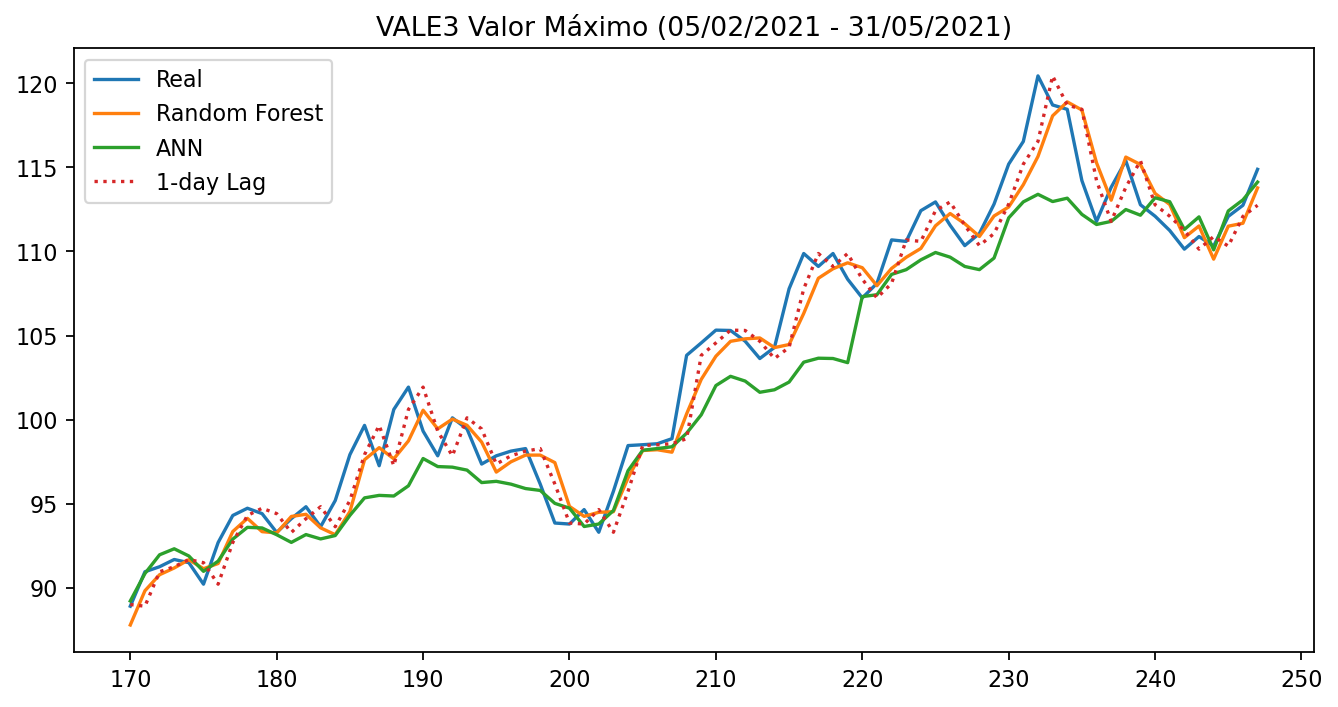

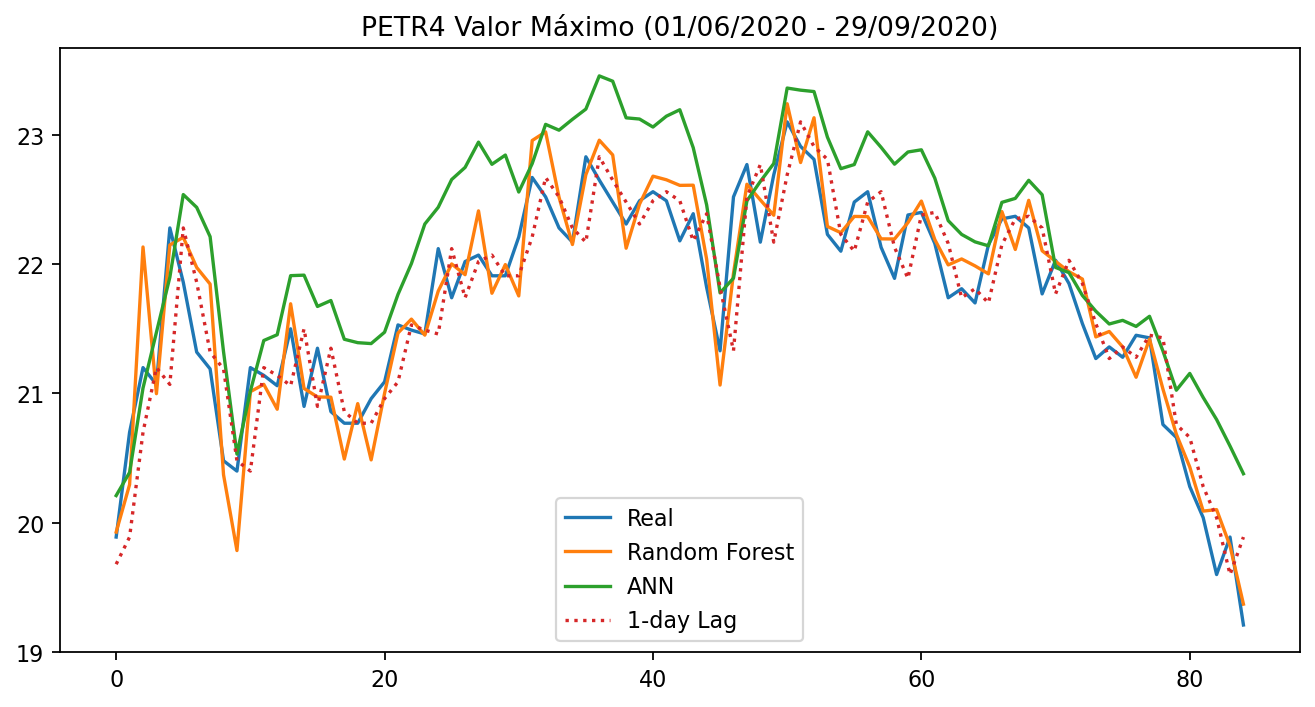

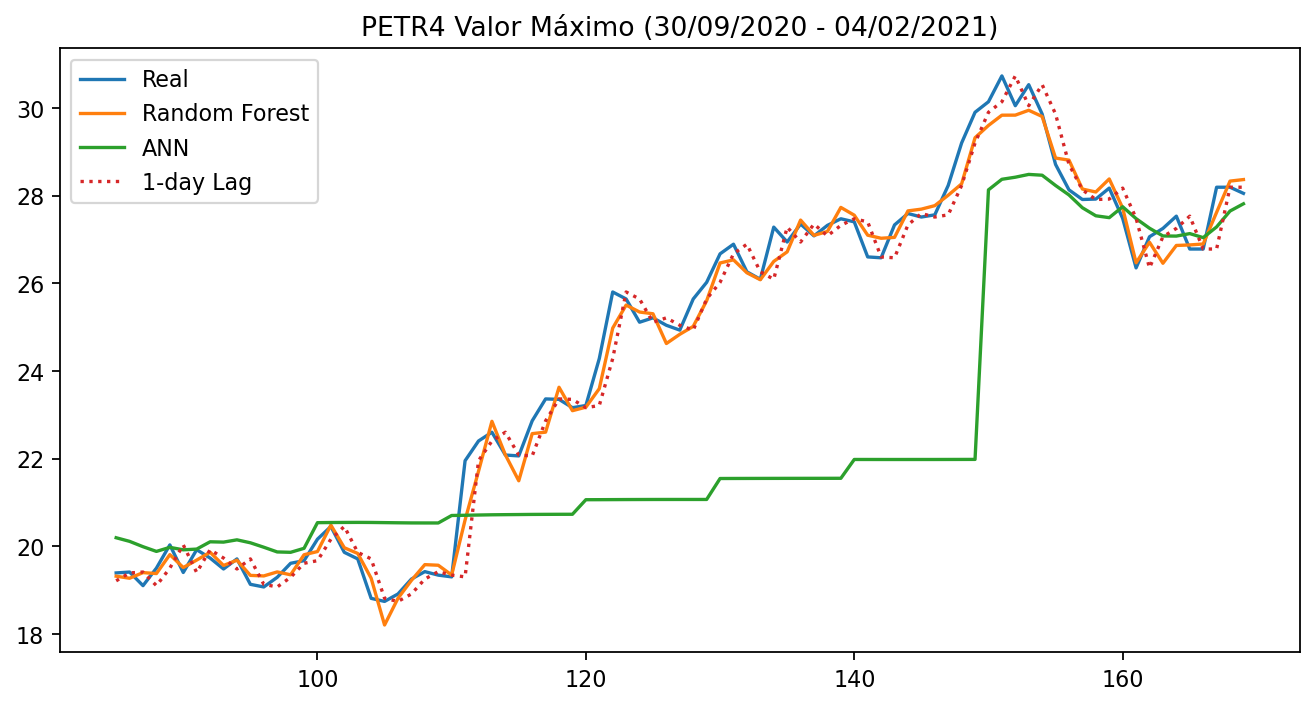

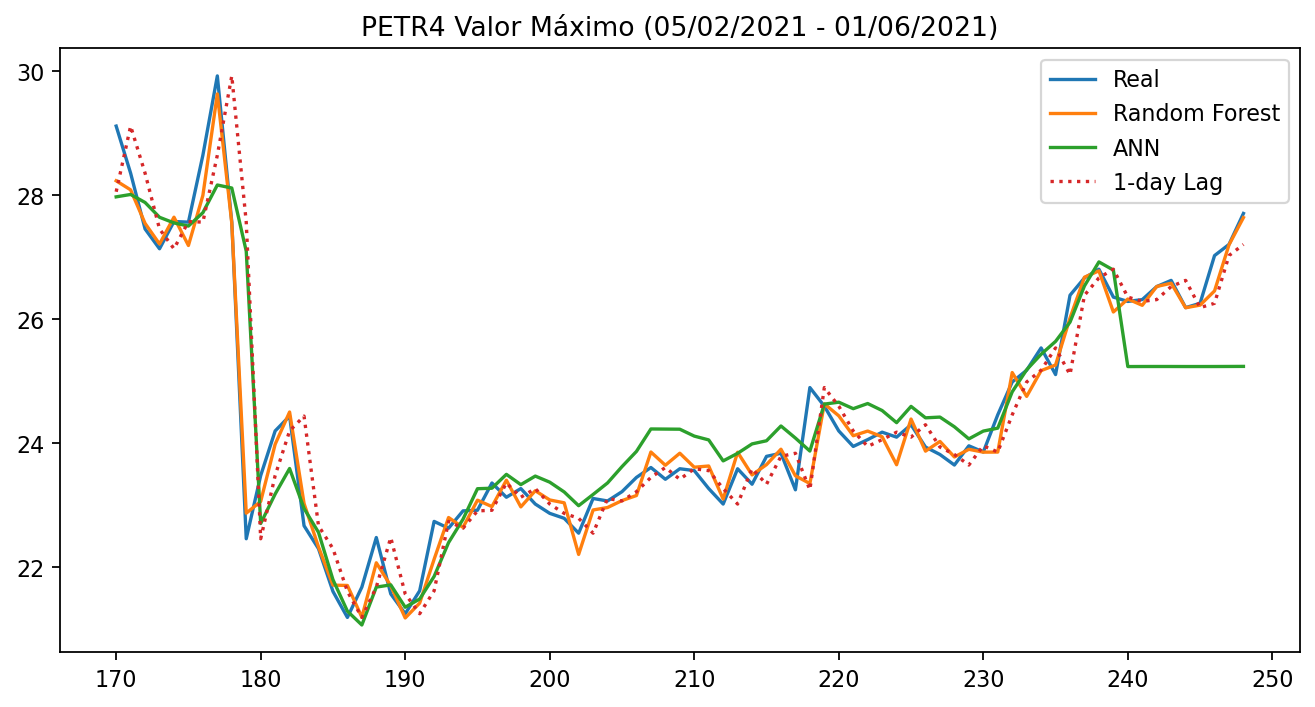

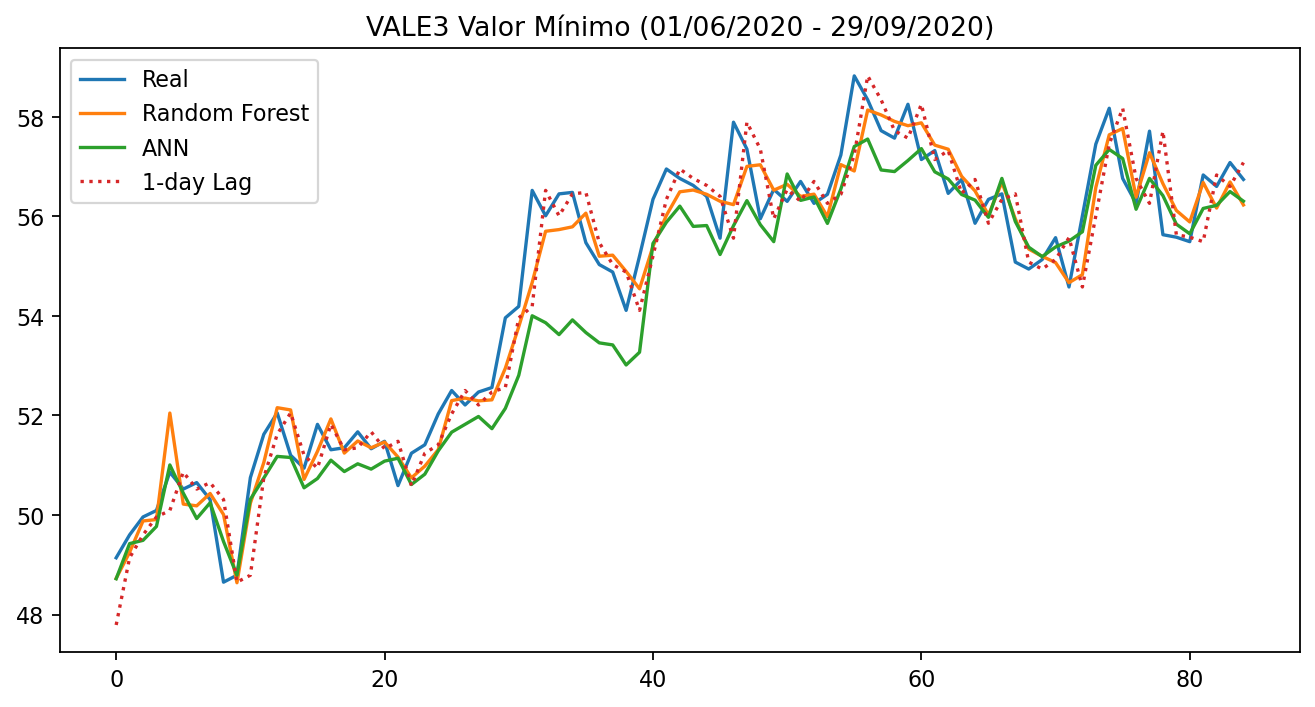

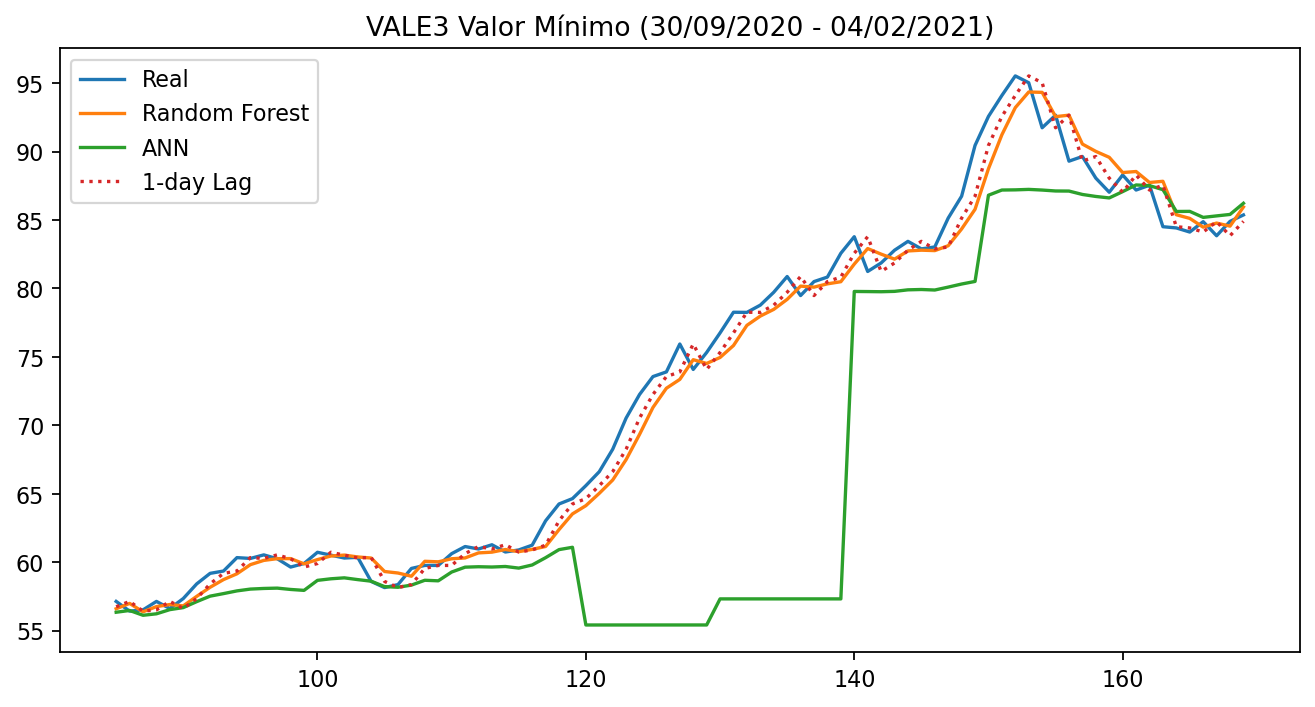

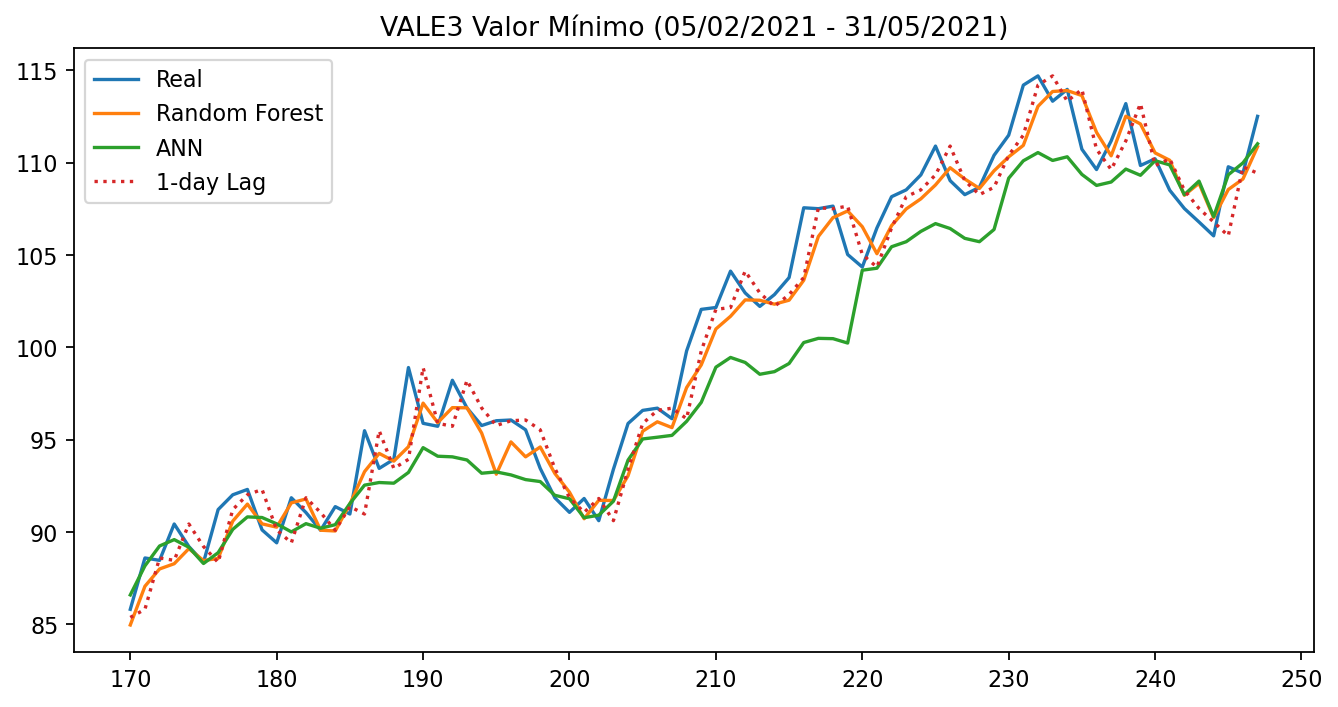

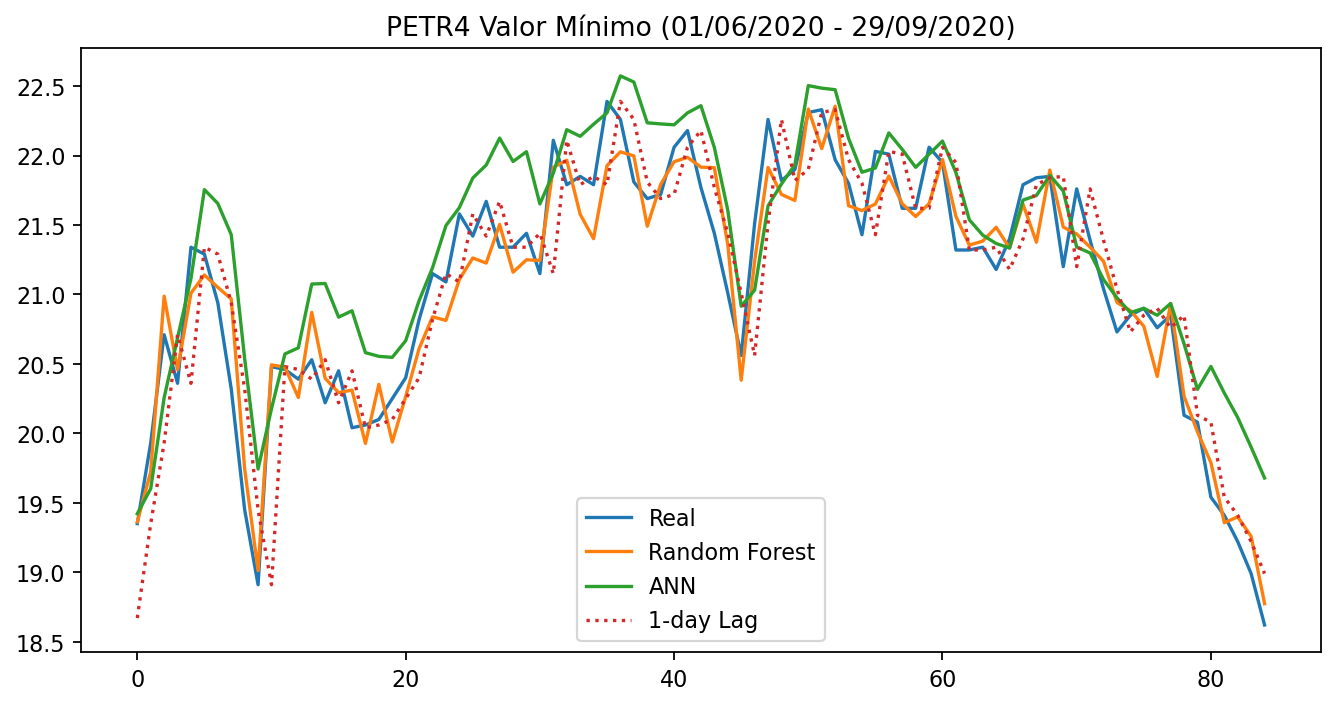

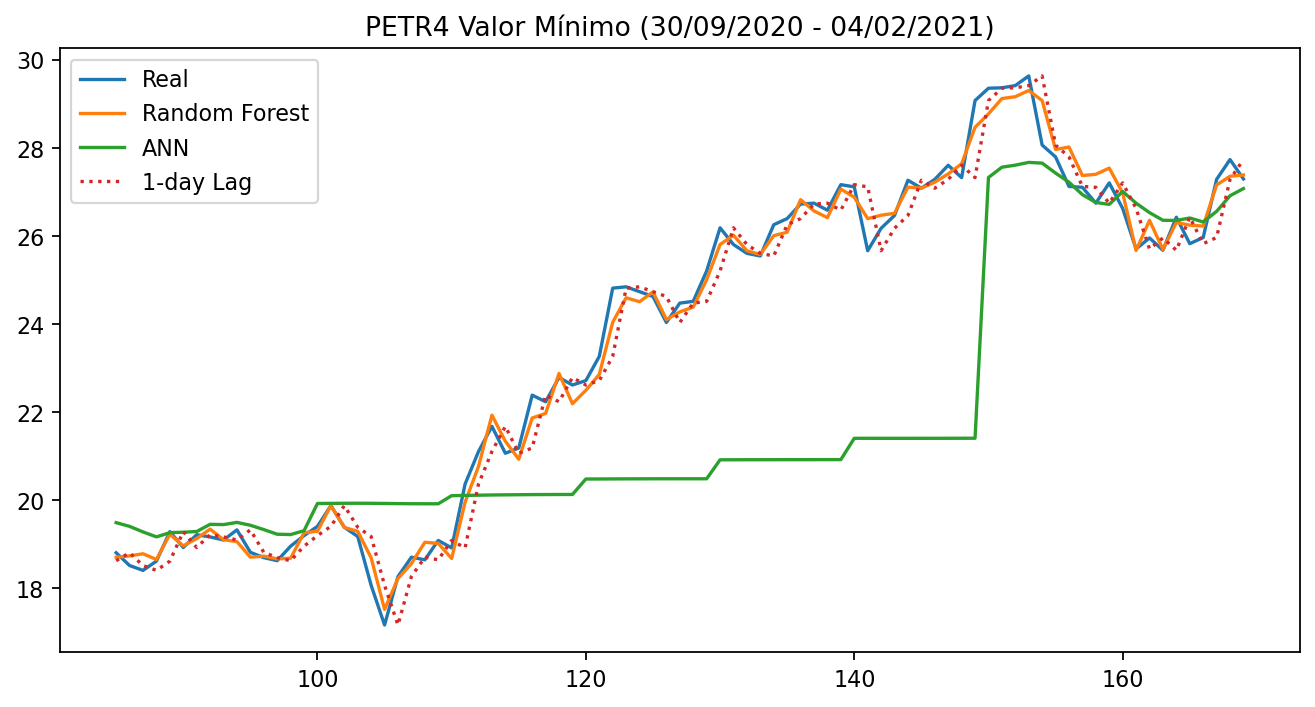

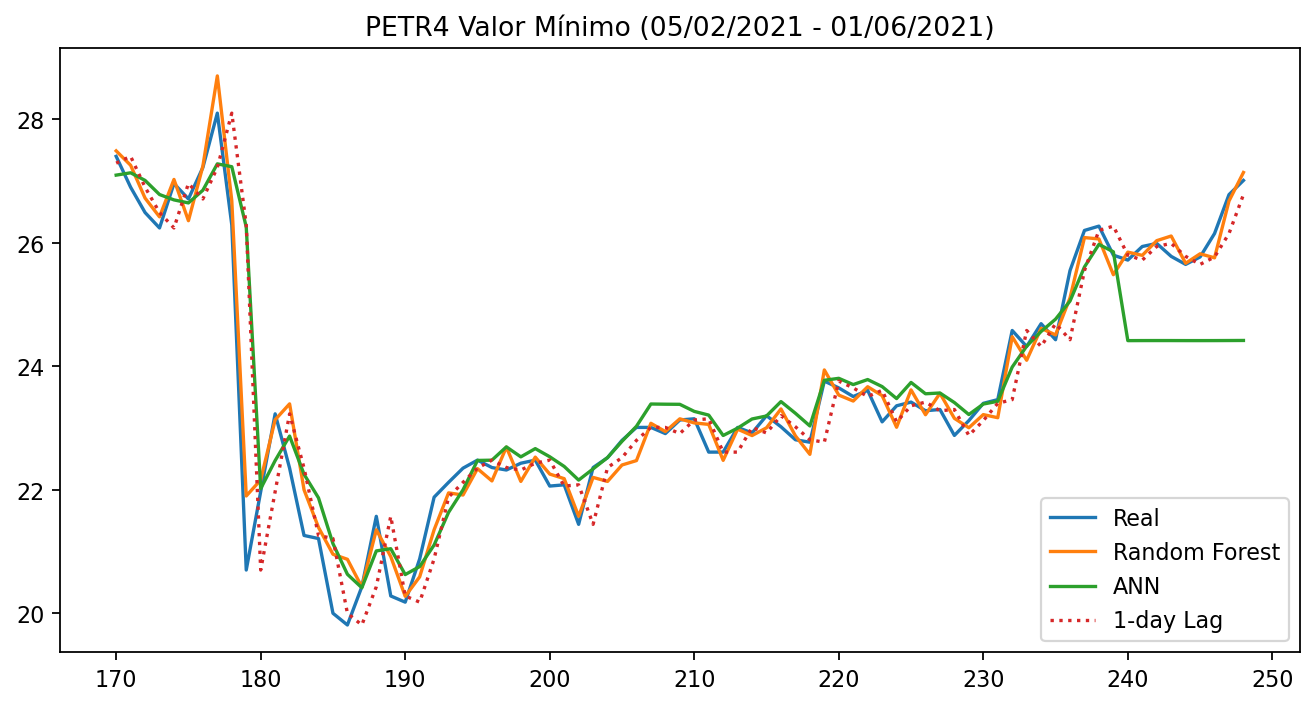

In [9]:
print(printResult(mape(pred_PETR4['high'],pred_PETR4['high_ANN15']), 'High'))
plotDf(pred_VALE3, 'VALE3 Valor Máximo')
plotDf(pred_PETR4, 'PETR4 Valor Máximo')
plotDf(pred_VALE3, 'VALE3 Valor Mínimo',False)
plotDf(pred_PETR4, 'PETR4 Valor Mínimo',False)

### Início do sistema

In [10]:
def getDay(df, day):
    return df[df['date']==day]

def buy(value, availableMoney, opr='normal'):
    lotValue = value*100
    quantity = math.floor(availableMoney/lotValue)
    
    amount = quantity*lotValue
    remainingMoney = availableMoney - amount
    
    return remainingMoney, quantity

def sell(value, amount, opr='normal'):
    if(opr == 'normal'):
        return value*amount*100
    else:
        return value*amount*100

In [20]:
def runStrategy(df, dailyDf, Money, stopLoss, std):
    size = len(df.index)

    Money = Money
    stopLoss = stopLoss

    orders = []

    for day in range(0,size):
        currentDay =  df.iloc[day].date

        lowPred = df.iloc[day].low_ANN15*(1+std)
        highPred = df.iloc[day].high_ANN15*(1-std)

        dayDf = getPeriod2(dailyDf, currentDay, currentDay)
        daySize = len(dayDf.index)

        op = 'none'
        quantity = 0
        trade = []

        for i in range(0,daySize):
            currentTime = dayDf.iloc[i]

            if((op == 'buy') and (currentTime.close < opPrice*(1-stopLoss) or currentTime.close >= highPred or i == daySize-1)):
                isStop = False
                if(currentTime.close < opPrice*(1-stopLoss)): isStop = True
                aux = sell(currentTime.close, quantity)
                Money = Money + aux 
                trade = trade + [currentTime.time, 'Sell', currentTime.close, currentTime.close-opPrice,(currentTime.close-opPrice)*100*quantity, isStop, Money]
                orders.append(trade)

                quantity = 0
                op = 'none'

            elif((op == 'sell') and (currentTime.close > opPrice*(1+stopLoss) or currentTime.close <= lowPred or i == daySize-1)):
                isStop = False
                if(currentTime.close > opPrice*(1+stopLoss)): isStop = True

                aux = sell(currentTime.close, quantity)
                Money = Money + (opPrice*100*quantity) + ((opPrice*100*quantity) - aux) 
                trade = trade + [currentTime.time, 'Buy', currentTime.close, opPrice-currentTime.close,(opPrice-currentTime.close)*100*quantity, isStop, Money]
                orders.append(trade)

                quantity = 0
                op = 'none'

            elif(op == 'none' and i < daySize-1 ):
                if(currentTime.close <= lowPred):
                    Money, quantity = buy(currentTime.close, Money)
                    opPrice = currentTime.close
                    op = 'buy'

                    trade = [currentTime.date, quantity, currentTime.time, 'Buy', currentTime.close]

                elif(currentTime.close >=  highPred):
                    Money, quantity = buy(currentTime.close, Money)
                    opPrice = currentTime.close
                    op = 'sell'

                    trade = [currentTime.date, quantity, currentTime.time, 'Sell', currentTime.close]
        print('eday '+str(day)+' money: '+str(Money))
    
    ordersDf = pd.DataFrame(orders)
    ordersDf.columns = ['date','batches','time_op1','op1','value_op1','time_op2','op2','value_op2', 'profit', 'totalProfit', 'stop','Amount']
    return ordersDf

In [21]:
testPetr = runStrategy(pred_PETR4, initialDf_PETR4, 100000, 0.000, 0.00)
print('Accuracy: '+str(round(100*len(testPetr[testPetr['profit'] > 0].index)/len(testPetr.index), 2)))

testVale = runStrategy(pred_VALE3, initialDf_VALE3, 100000, 0.000, 0.00)
print('Accuracy: '+str(round(100*len(testVale[testVale['profit'] > 0].index)/len(testVale.index), 2)))

eday 0 money: 100000
eday 1 money: 98464.0
eday 2 money: 100304.0
eday 3 money: 101726.0
eday 4 money: 104256.00000000001
eday 5 money: 105504.00000000001
eday 6 money: 104230.00000000004
eday 7 money: 104889.00000000004
eday 8 money: 105972.00000000006
eday 9 money: 109374.00000000009
eday 10 money: 111771.00000000009
eday 11 money: 112905.00000000009
eday 12 money: 115215.00000000009
eday 13 money: 115016.00000000007
eday 14 money: 112266.00000000004
eday 15 money: 112735.00000000001
eday 16 money: 111439.00000000001
eday 17 money: 113693.00000000001
eday 18 money: 111878.00000000001
eday 19 money: 114956.00000000003
eday 20 money: 117086.00000000004
eday 21 money: 117031.00000000004
eday 22 money: 117031.00000000004
eday 23 money: 117416.00000000003
eday 24 money: 117416.00000000003
eday 25 money: 116339.00000000004
eday 26 money: 117346.00000000004
eday 27 money: 115749.00000000004
eday 28 money: 118017.00000000006
eday 29 money: 117477.00000000009
eday 30 money: 121198.00000000012

In [13]:
testPetr.tail(10)

,date,batches,time_op1,op1,value_op1,time_op2,op2,value_op2,profit,totalProfit,stop,Amount
707,2021.05.28,49,14:45:00,Sell,26.95,16:45:00,Buy,26.99,-0.04,-196.0,False,134123.0
708,2021.05.31,49,10:00:00,Sell,26.97,10:15:00,Buy,26.92,0.05,245.0,False,134368.0
709,2021.05.31,49,10:30:00,Sell,27.00,11:30:00,Buy,26.94,0.06,294.0,False,134662.0
710,2021.05.31,49,11:45:00,Sell,26.95,12:00:00,Buy,26.85,0.10,490.0,False,135152.0
711,2021.05.31,50,12:15:00,Buy,26.81,16:45:00,Sell,26.87,0.06,300.0,False,135452.0
712,2021.06.01,49,10:00:00,Buy,27.37,10:15:00,Sell,27.52,0.15,735.0,False,136187.0
713,2021.06.01,49,10:30:00,Buy,27.36,10:45:00,Sell,27.36,0.00,0.0,False,136187.0
714,2021.06.01,49,11:00:00,Sell,27.42,11:30:00,Buy,27.37,0.05,245.0,False,136432.0
715,2021.06.01,50,11:45:00,Buy,27.18,14:30:00,Sell,27.02,-0.16,-800.0,True,135632.0
716,2021.06.01,50,14:45:00,Buy,27.10,16:45:00,Sell,27.29,0.19,950.0,False,136582.0


In [14]:
display(testVale.loc[330:500].head(60))

,date,batches,time_op1,op1,value_op1,time_op2,op2,value_op2,profit,totalProfit,stop,Amount
330,2020.11.16,21,11:45:00,Buy,61.53,12:00:00,Sell,61.81,0.28,588.0,False,130693.0
331,2020.11.16,21,12:15:00,Sell,61.83,15:45:00,Buy,62.25,-0.42,-882.0,True,129811.0
332,2020.11.16,20,16:00:00,Sell,62.18,16:30:00,Buy,62.54,-0.36,-720.0,True,129091.0
333,2020.11.16,20,16:45:00,Sell,62.80,17:15:00,Buy,63.15,-0.35,-700.0,True,128391.0
334,2020.11.16,20,17:30:00,Sell,63.25,17:45:00,Buy,63.13,0.12,240.0,False,128631.0
335,2020.11.17,20,10:00:00,Sell,63.33,11:00:00,Buy,63.65,-0.32,-640.0,True,127991.0
336,2020.11.17,20,11:15:00,Sell,63.82,11:30:00,Buy,64.14,-0.32,-640.0,True,127351.0
337,2020.11.17,19,11:45:00,Sell,64.49,12:00:00,Buy,64.99,-0.50,-950.0,True,126401.0
338,2020.11.17,19,12:15:00,Sell,65.33,13:45:00,Buy,65.72,-0.39,-741.0,True,125660.0
339,2020.11.17,19,14:00:00,Sell,65.84,17:45:00,Buy,65.13,0.71,1349.0,False,127009.0


In [15]:
Final = testVale.tail(1).Amount
#size = len(testVale)
size = 248

def AnnualReturn(initial, final, days):
    return ((final/initial)**(365.25/days))-1

print(AnnualReturn(100000,Final,size))


699    0.164775
Name: Amount, dtype: float64


min 100815.99999999999
612.0000000000146
max 101665.99999999997
min 97450.99999999999
4214.999999999985
min 96789.99999999999
4875.999999999985
max 102555.0
max 107108.99999999996
max 108031.99999999996
max 111100.99999999997
max 111698.99999999999
max 113028.00000000001
max 113767.00000000001
max 113774.0
max 114312.9999999999
max 114744.99999999988
max 115511.99999999988
max 116685.99999999994
max 117540.99999999985
max 121399.99999999985
max 122255.99999999981
max 122448.99999999985
max 125117.99999999981
max 126441.99999999975
max 127514.99999999975
max 128987.99999999971
max 129101.99999999972
max 131170.9999999997
max 131563.9999999997
max 133020.9999999997
max 136443.9999999997
max 140038.9999999997
max 141015.9999999997
max 145487.9999999997
max 146991.9999999997
max 148347.99999999968
max 149328.9999999997
max 149349.99999999974
max 152733.99999999974
max 152931.99999999974


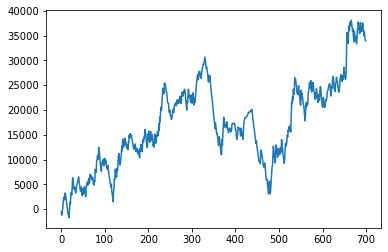

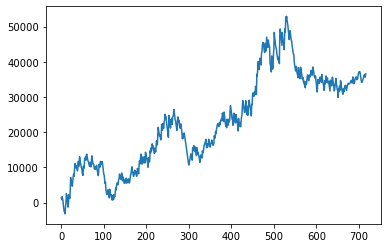

In [16]:
df = testVale
length = len(testPetr.index)

tst = df['totalProfit'].cumsum()
plt.figure();
tst.plot();

df = testPetr
tst = df['totalProfit'].cumsum()
plt.figure();
tst.plot();

lst = []

for i in range (0, length-1):
    trade = df.iloc[i]
    if (i==0):
        max = trade.Amount
        min = trade.Amount
    elif(trade.Amount > df.iloc[i-1].Amount and trade.Amount > df.iloc[i+1].Amount):
        if(trade.Amount > max):
            max = trade.Amount
            print('max ' + str(max))
        
    elif(trade.Amount < df.iloc[i-1].Amount and trade.Amount < df.iloc[i+1].Amount):
        if(trade.Amount < min):
            min = trade.Amount
            print('min ' + str(min))
            drawdown = max - min
            lst.append(drawdown)
            print(drawdown)